In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
df = pd.read_csv('/content/drive/MyDrive/time series project/data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')

In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df = df.set_index('DATE',drop = True)

In [7]:
df.columns

Index(['SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI',
       'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       'NASDAQ.AMAT',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=501)

In [8]:
new_df = df[['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']]

In [9]:
new_df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [10]:
new_df.isna().sum()

NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [11]:
print(new_df.describe())

        NASDAQ.AAPL    NASDAQ.ADP   NASDAQ.CBOE   NASDAQ.CSCO   NASDAQ.EBAY
count  41266.000000  41266.000000  41266.000000  41266.000000  41266.000000
mean     150.453566    103.480398     89.325485     32.139336     34.794506
std        6.236826      4.424244      5.746178      0.985571      1.099296
min      140.160000     95.870000     80.000000     30.365000     31.890000
25%      144.640000    101.300000     84.140000     31.455000     34.065000
50%      149.945000    102.440000     89.315000     31.773300     34.770000
75%      155.065000    104.660000     93.850000     32.790000     35.610000
max      164.510000    121.770000    101.350000     34.490000     37.460000


In [13]:
print(new_df.isnull().sum())  # Check if there are missing values in the dataset

NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64


Data Transformation

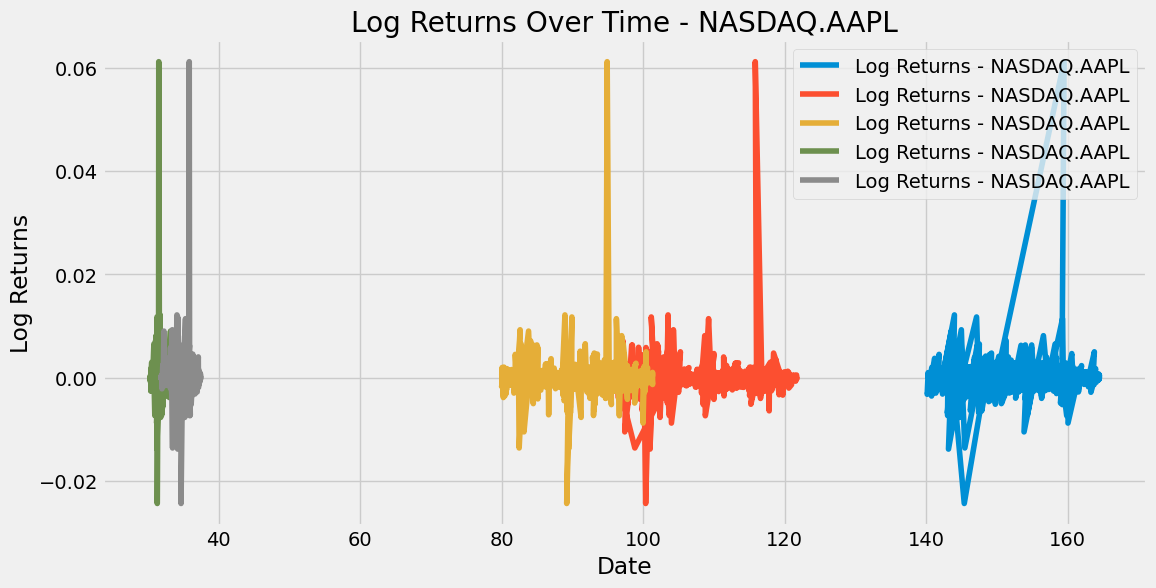

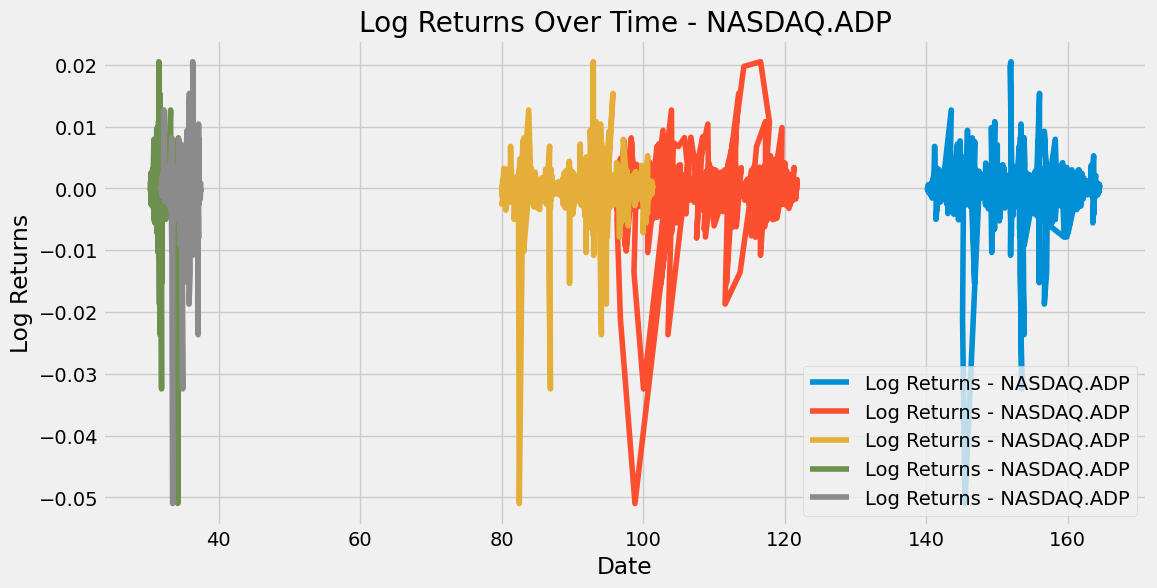

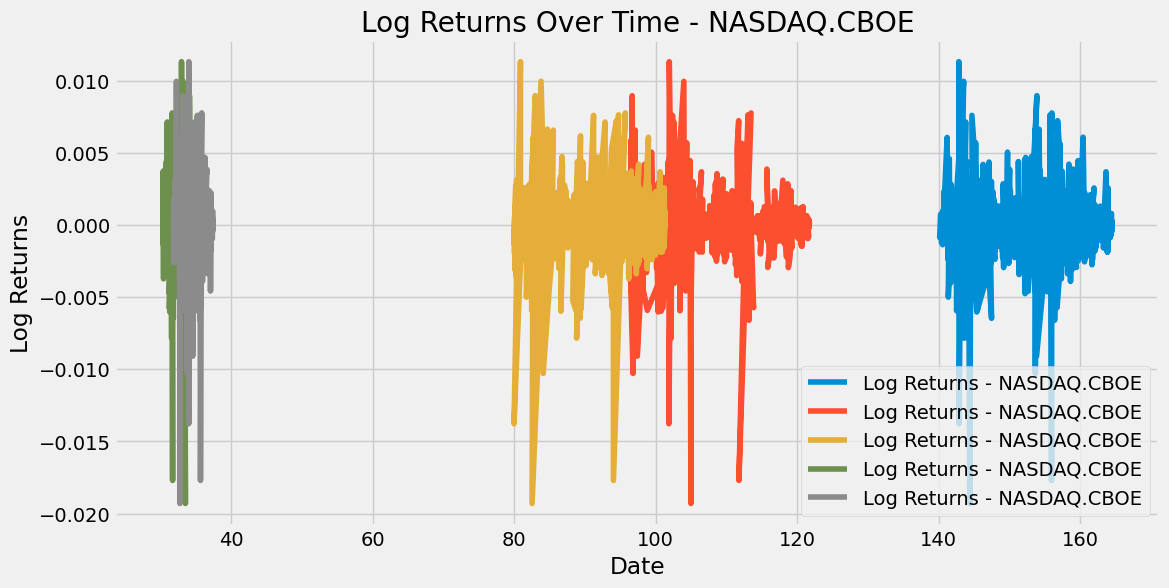

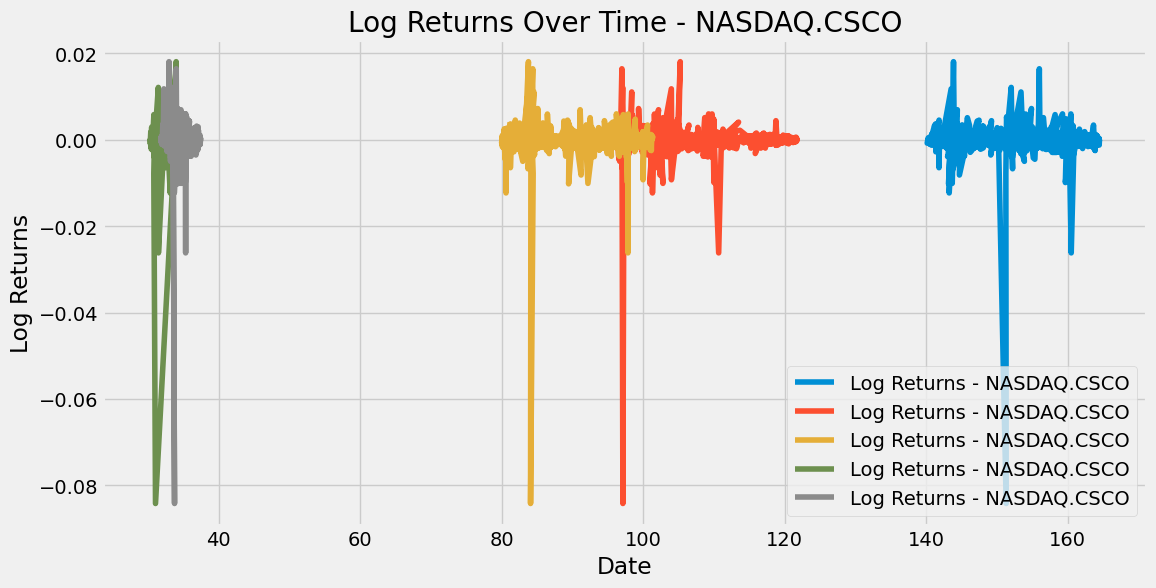

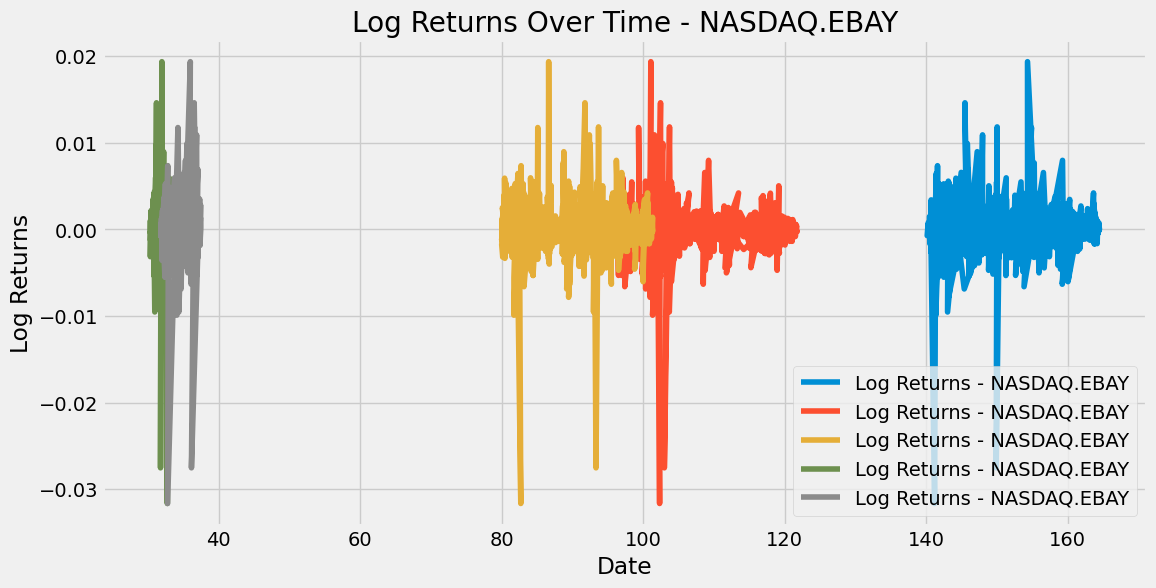

                     NASDAQ.AAPL  NASDAQ.ADP  NASDAQ.CBOE  NASDAQ.CSCO  \
DATE                                                                     
2017-04-03 13:31:00     0.000139   -0.000881     0.002219     0.004141   
2017-04-03 13:32:00    -0.000069    0.000710     0.000000     0.000590   
2017-04-03 13:33:00    -0.000349   -0.000710    -0.000986    -0.001479   
2017-04-03 13:34:00     0.000139   -0.000784    -0.000123    -0.000293   
2017-04-03 13:35:00     0.000835   -0.000196     0.001232     0.001181   

                     NASDAQ.EBAY  
DATE                              
2017-04-03 13:31:00    -0.000075  
2017-04-03 13:32:00     0.000449  
2017-04-03 13:33:00    -0.002247  
2017-04-03 13:34:00     0.001948  
2017-04-03 13:35:00     0.000898  


In [16]:
# Calculate log returns for selected stocks
log_returns = pd.DataFrame()  # Create an empty DataFrame to store log returns

for stock in new_df.columns:
    log_returns[stock] = np.log(new_df[stock] / new_df[stock].shift(1))  # Calculate log returns

# Drop the first row with NaN values
log_returns = log_returns.dropna()

# Visualize log returns for each selected stock
for stock in new_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(new_df.iloc[1:], log_returns[stock], label=f'Log Returns - {stock}')
    plt.title(f'Log Returns Over Time - {stock}')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

# Check the transformed data
print(log_returns.head())

Time series analysis

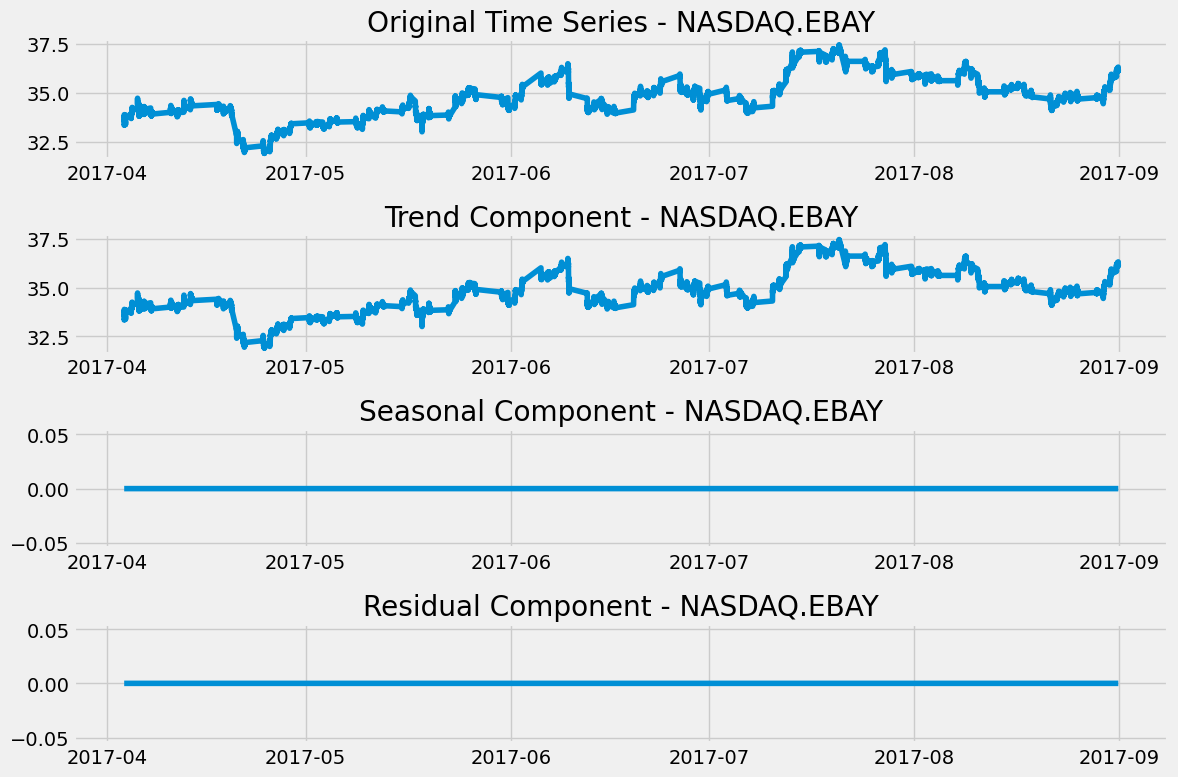

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose a stock dynamically from the selected_stocks list
selected_stock = new_df.columns[4]  # You can change the index to select a different stock

# Perform decomposition for the selected stock
decomposition = seasonal_decompose(new_df[selected_stock], model='additive',filt=None, period=1, two_sided=True, extrapolate_trend='freq')

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(new_df.index, new_df[selected_stock], label='Original')
plt.title(f'Original Time Series - {selected_stock}')
plt.grid(True)

plt.subplot(412)
plt.plot(new_df.index, trend, label='Trend')
plt.title(f'Trend Component - {selected_stock}')
plt.grid(True)

plt.subplot(413)
plt.plot(new_df.index, seasonal, label='Seasonal')
plt.title(f'Seasonal Component - {selected_stock}')
plt.grid(True)

plt.subplot(414)
plt.plot(new_df.index, residual, label='Residual')
plt.title(f'Residual Component - {selected_stock}')
plt.grid(True)

plt.tight_layout()
plt.show()


check foor stationary data

In [32]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(selected_stock, df):
    print(f'_________{selected_stock}_________')
    # Perform Augmented Dickey-Fuller test for stationarity
    result = adfuller(df[selected_stock])

    # Print the ADF test results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

    # Check for stationarity based on p-value
    if result[1] <= 0.05:
        return f'The time series is likely stationary (p-value: {result[1]})'
    else:
        return f'The time series is likely non-stationary (p-value: {result[1]})'

# Example usage:
for stock in new_df.columns:
  stationarity_result = check_stationarity(stock, new_df)
  print(stationarity_result)


_________NASDAQ.AAPL_________
ADF Statistic: -0.9128532997926699
p-value: 0.7837101772613857
Critical Values:
1%: -3.4305085998723857
5%: -2.8616100975579815
10%: -2.5668073106689477
The time series is likely non-stationary (p-value: 0.7837101772613857)
_________NASDAQ.ADP_________
ADF Statistic: -1.7041735251574734
p-value: 0.42896344420668747
Critical Values:
1%: -3.4305086306509716
5%: -2.861610111161057
10%: -2.5668073179094897
The time series is likely non-stationary (p-value: 0.42896344420668747)
_________NASDAQ.CBOE_________
ADF Statistic: 0.1663393028261411
p-value: 0.970309203051007
Critical Values:
1%: -3.430508584487571
5%: -2.8616100907584228
10%: -2.5668073070497304
The time series is likely non-stationary (p-value: 0.970309203051007)
_________NASDAQ.CSCO_________
ADF Statistic: -2.3955546108894716
p-value: 0.14299501995164177
Critical Values:
1%: -3.430508661441506
5%: -2.8616101247694137
10%: -2.566807325152842
The time series is likely non-stationary (p-value: 0.1429950

ADF Statistic: -35.73774148340114
p-value: 0.0
Critical Values:
1%: -3.4305085998723857
5%: -2.8616100975579815
10%: -2.5668073106689477
The differenced time series is likely stationary (p-value: 0.0)


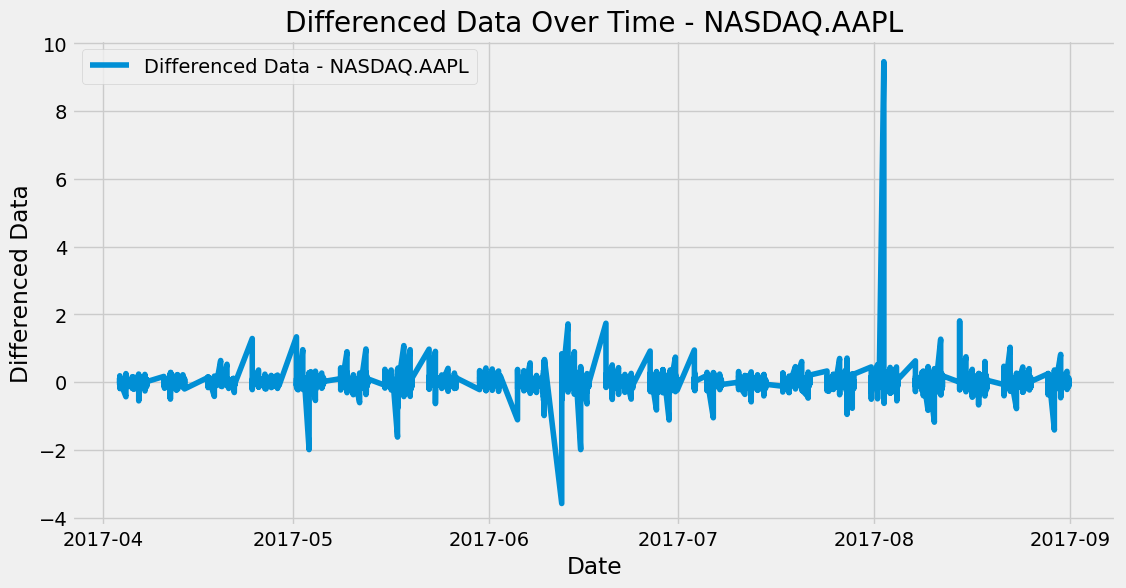

ADF Statistic: -31.055662244631684
p-value: 0.0
Critical Values:
1%: -3.4305086306509716
5%: -2.861610111161057
10%: -2.5668073179094897
The differenced time series is likely stationary (p-value: 0.0)


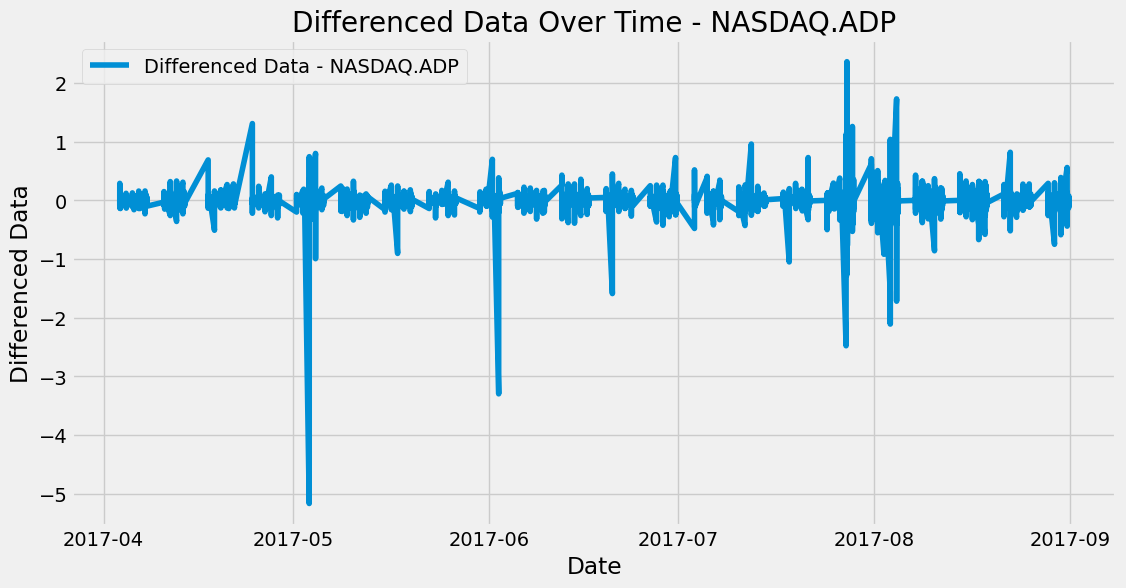

ADF Statistic: -41.64209364543132
p-value: 0.0
Critical Values:
1%: -3.430508584487571
5%: -2.8616100907584228
10%: -2.5668073070497304
The differenced time series is likely stationary (p-value: 0.0)


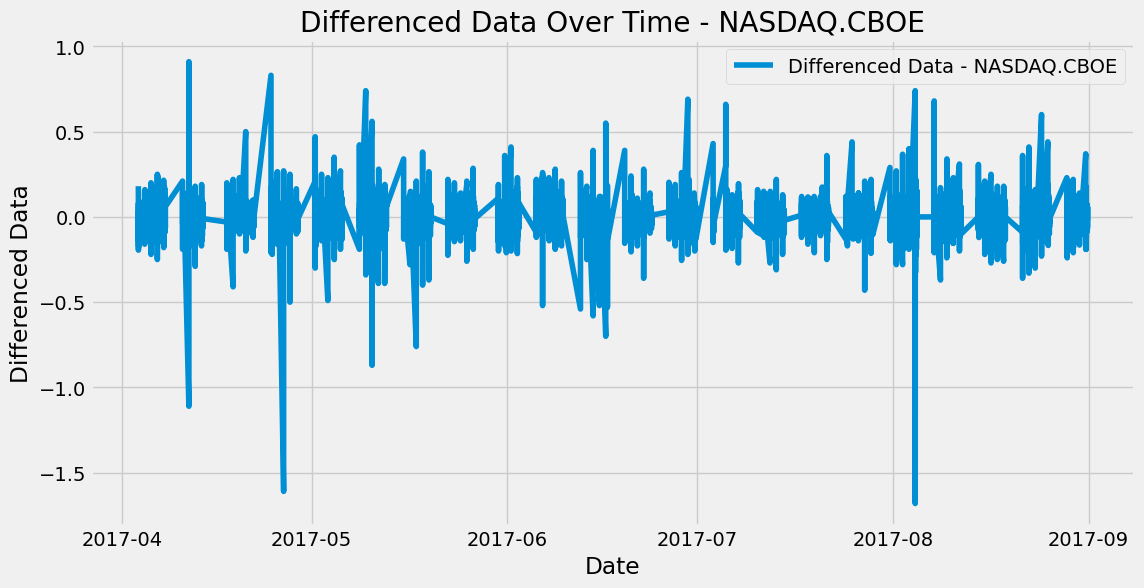

ADF Statistic: -30.356682532567326
p-value: 0.0
Critical Values:
1%: -3.430508661441506
5%: -2.8616101247694137
10%: -2.566807325152842
The differenced time series is likely stationary (p-value: 0.0)


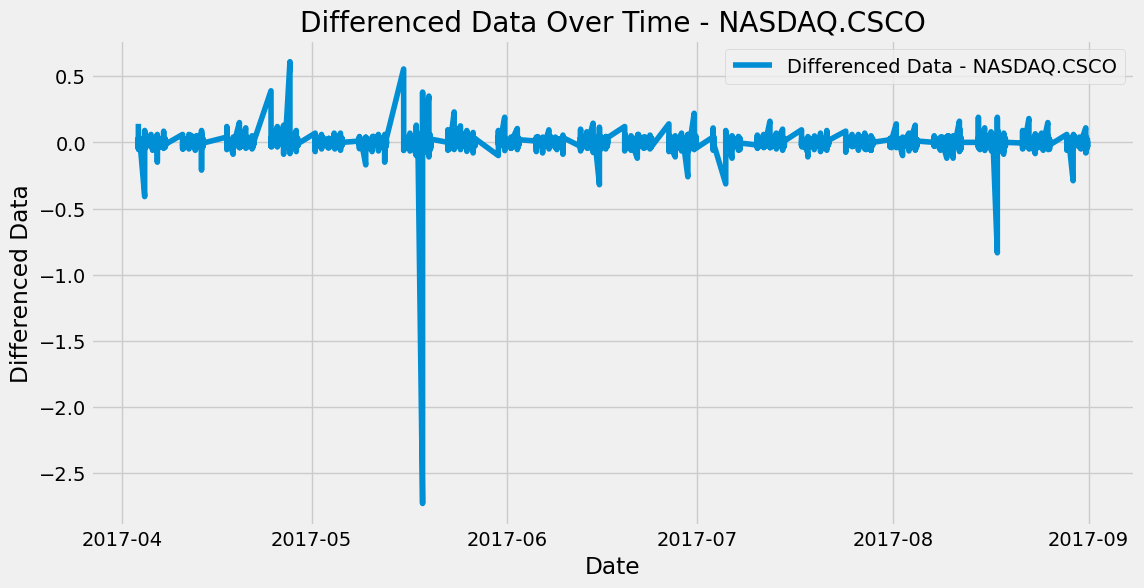

ADF Statistic: -30.67961923919419
p-value: 0.0
Critical Values:
1%: -3.430508661441506
5%: -2.8616101247694137
10%: -2.566807325152842
The differenced time series is likely stationary (p-value: 0.0)


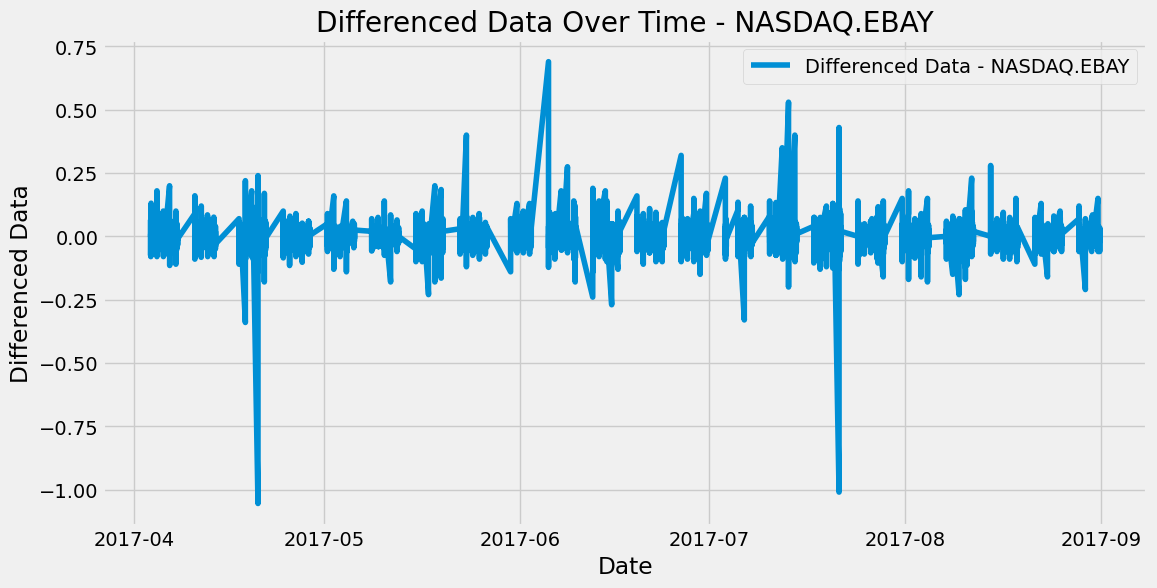

In [34]:
def difference_and_test_stationarity(selected_stock, df):
    # Apply differencing to make the data stationary
    differenced_data = df[selected_stock].diff().dropna()

    # Perform Augmented Dickey-Fuller test for stationarity on differenced data
    result = adfuller(differenced_data)

    # Print the ADF test results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

    # Check for stationarity based on p-value
    if result[1] <= 0.05:
        print(f'The differenced time series is likely stationary (p-value: {result[1]})')
    else:
        print(f'The differenced time series is likely non-stationary (p-value: {result[1]})')

    # Visualize the differenced data
    plt.figure(figsize=(12, 6))
    plt.plot(differenced_data.index, differenced_data, label=f'Differenced Data - {selected_stock}')
    plt.title(f'Differenced Data Over Time - {selected_stock}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
for stock in new_df.columns:
  difference_and_test_stationarity(stock, new_df)

In [35]:
differenced_data = new_df.diff().dropna() # difference data or stationary data

In [36]:
differenced_data.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:31:00,0.0200,-0.0900,0.18,0.1400,-0.0025
2017-04-03 13:32:00,-0.0099,0.0725,0.00,0.0200,0.0150
2017-04-03 13:33:00,-0.0501,-0.0725,-0.08,-0.0501,-0.0750
2017-04-03 13:34:00,0.0200,-0.0800,-0.01,-0.0099,0.0650
2017-04-03 13:35:00,0.1200,-0.0200,0.10,0.0400,0.0300


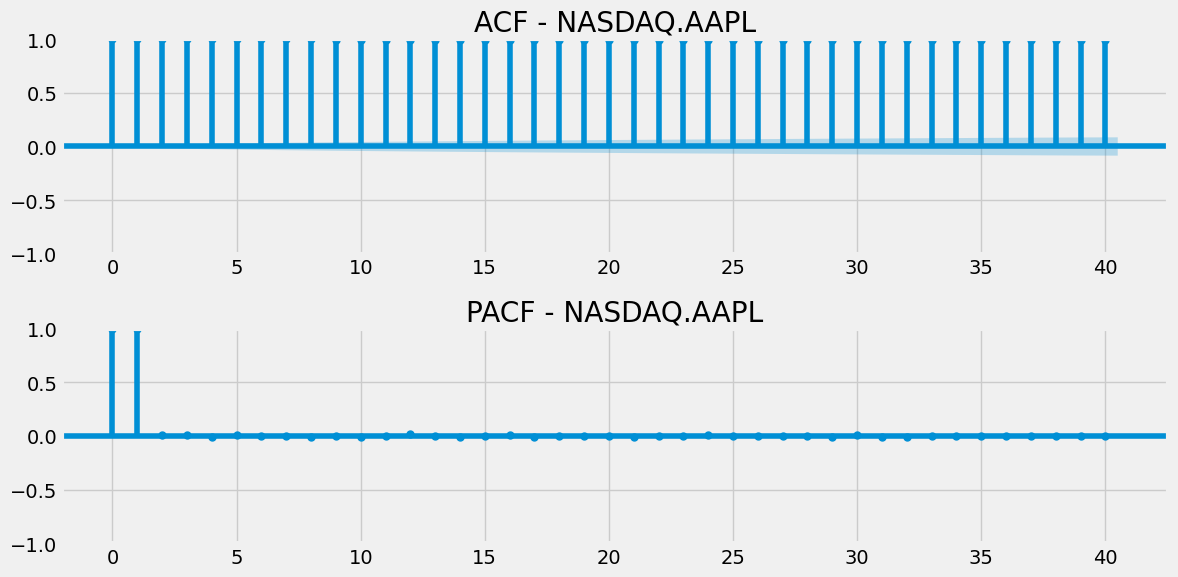

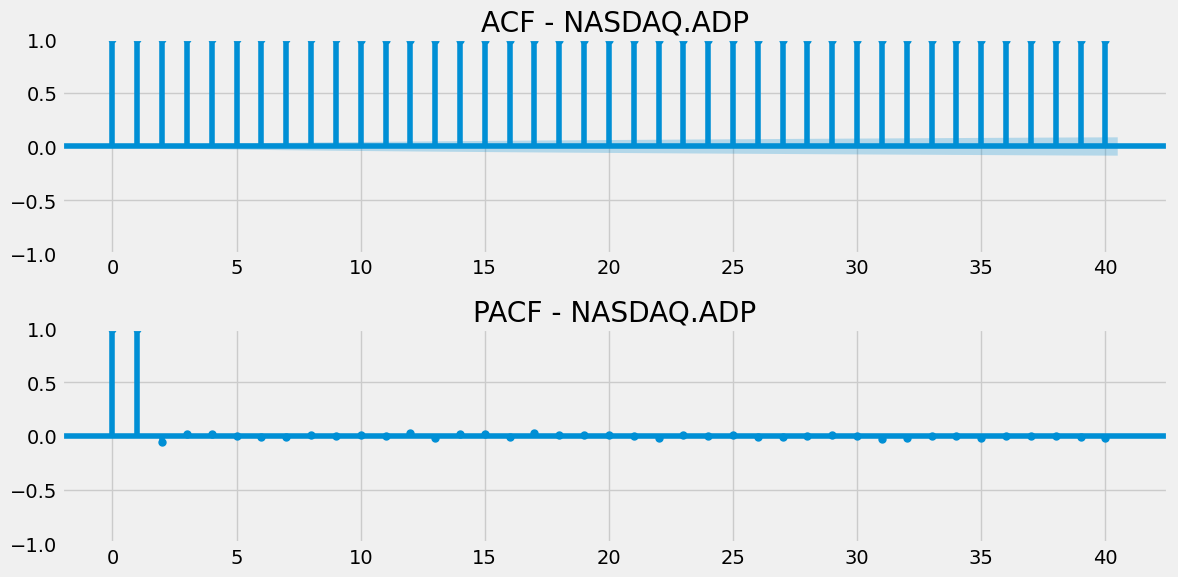

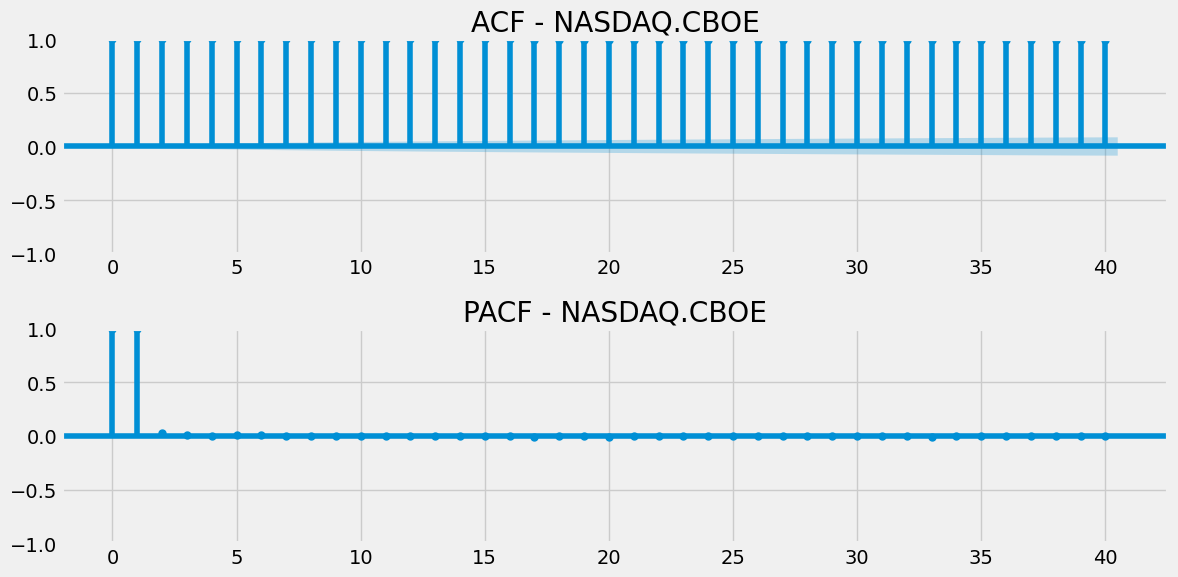

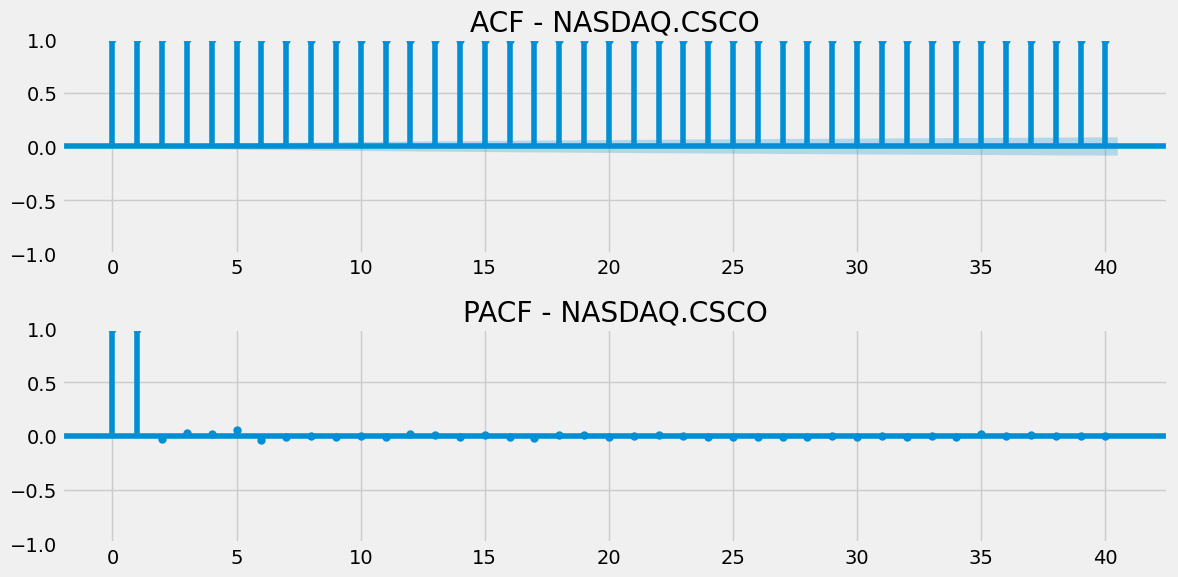

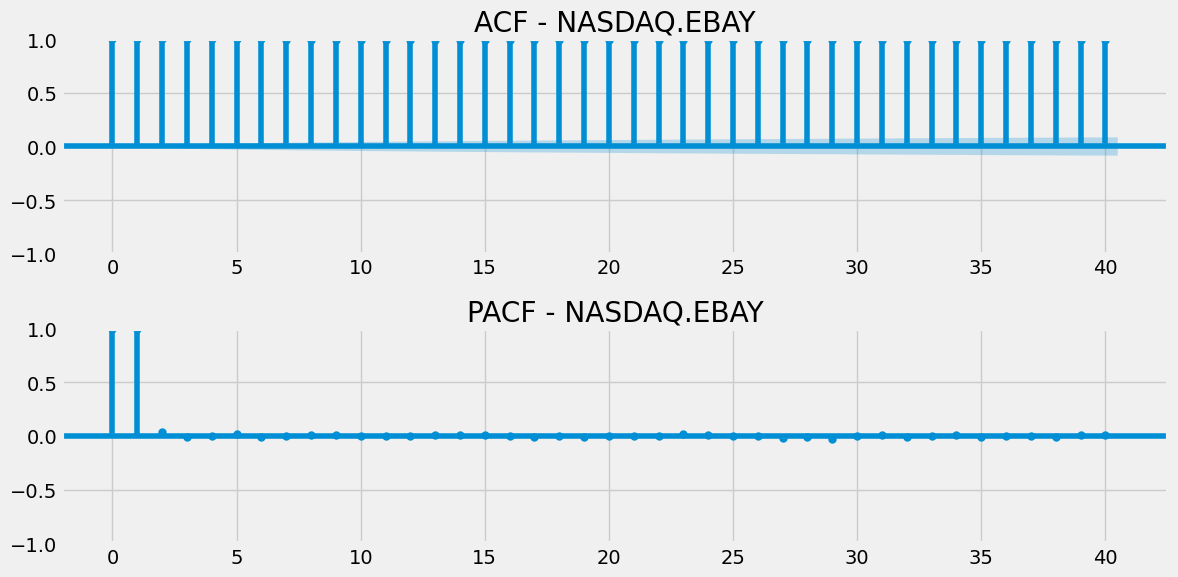

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def identify_seasonal_order(selected_stock, df):
    # Plot ACF and PACF to identify seasonal order (SARIMA)
    plt.figure(figsize=(12, 6))

    plt.subplot(211)
    plot_acf(df[selected_stock].dropna(), lags=40, ax=plt.gca(), title=f'ACF - {selected_stock}')

    plt.subplot(212)
    plot_pacf(df[selected_stock].dropna(), lags=40, ax=plt.gca(), title=f'PACF - {selected_stock}')

    plt.tight_layout()
    plt.show()

# Example usage:
for stock in new_df.columns:
  identify_seasonal_order(stock, new_df)

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Choose the selected stocks
selected_stocks = ['NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO', 'NASDAQ.EBAY']

def train_arima_models(selected_stocks, df):
    for selected_stock in selected_stocks:
        print(f'Training ARIMA model for {selected_stock}...')

        # Apply differencing to make the data stationary
        differenced_data = df[selected_stock].diff().dropna()

        # Split the data into training and testing sets
        train_size = int(len(differenced_data) * 0.8)
        train, test = differenced_data[0:train_size], differenced_data[train_size:]

        # Initialize variables for best parameters and RMSE
        best_p, best_d, best_q = None, None, None
        best_rmse = float('inf')

        # Initialize a flag to check if valid parameters were found
        parameters_found = False

        for p in range(3):  # Adjust the range as needed
            for d in range(2):  # Adjust the range as needed
                for q in range(3):  # Adjust the range as needed
                    try:
                        model = ARIMA(train, order=(p, d, q))
                        model_fit = model.fit(disp=0)
                        predictions = model_fit.forecast(steps=len(test))[0]

                        rmse = sqrt(mean_squared_error(test, predictions))

                        if rmse < best_rmse:
                            best_p, best_d, best_q = p, d, q
                            best_rmse = rmse
                            parameters_found = True
                    except:
                        continue

        if parameters_found:
            print(f'Best ARIMA Parameters for {selected_stock}: (p={best_p}, d={best_d}, q={best_q})')
            print(f'Best RMSE: {best_rmse}')
        else:
            print(f'No valid ARIMA parameters found for {selected_stock}')

        # Train the ARIMA model with the best parameters on the full dataset if parameters were found
        if parameters_found:
            final_model = ARIMA(differenced_data, order=(best_p, best_d, best_q))
            final_model_fit = final_model.fit(disp=0)

            # Forecast future values
            forecast_steps = len(test)
            forecast = final_model_fit.forecast(steps=forecast_steps)

            # Inverse difference to get original scale
            predicted_values = np.cumsum(np.insert(forecast, 0, differenced_data.iloc[-1]))
            predicted_values = pd.Series(predicted_values, index=test.index)

            # Plot the original and predicted data
            plt.figure(figsize=(12, 6))
            plt.plot(df.index[-forecast_steps:], test, label='Original Data')
            plt.plot(df.index[-forecast_steps:], predicted_values, label='Predicted Data')
            plt.title(f'ARIMA Forecast for {selected_stock}')
            plt.xlabel('Date')
            plt.ylabel('Differenced Data')
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage:
train_arima_models(selected_stocks, new_df)


Training ARIMA model for NASDAQ.AAPL...
No valid ARIMA parameters found for NASDAQ.AAPL
Training ARIMA model for NASDAQ.ADP...
No valid ARIMA parameters found for NASDAQ.ADP
Training ARIMA model for NASDAQ.CBOE...
No valid ARIMA parameters found for NASDAQ.CBOE
Training ARIMA model for NASDAQ.CSCO...
No valid ARIMA parameters found for NASDAQ.CSCO
Training ARIMA model for NASDAQ.EBAY...
No valid ARIMA parameters found for NASDAQ.EBAY


In [59]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Choose the selected stocks
selected_stocks = ['NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO', 'NASDAQ.EBAY']

# Extract data for selected stocks
stock_data = df[selected_stocks].values

# Normalize the data for each stock
scalers = {}
for i in range(len(selected_stocks)):
    scaler = MinMaxScaler()
    stock_data[:, i:i+1] = scaler.fit_transform(stock_data[:, i:i+1])
    scalers[selected_stocks[i]] = scaler

# Define the number of time steps to look back
look_back = 10  # Adjust as needed

# Create sequences for training
X, y = [], []
for i in range(len(stock_data) - look_back):
    X.append(stock_data[i:i+look_back])
    y.append(stock_data[i+look_back])

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(selected_stocks))))
model.add(Dense(len(selected_stocks)))  # Output layer has the same number of neurons as there are stocks
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Make predictions on the entire dataset
predictions = model.predict(X)

# Inverse transform predictions to the original scale for each stock
for i in range(len(selected_stocks)):
    scaler = scalers[selected_stocks[i]]
    predictions[:, i:i+1] = scaler.inverse_transform(predictions[:, i:i+1])

# Calculate RMSE for the entire dataset
rmse = sqrt(mean_squared_error(stock_data[look_back:], predictions))
print(f'RMSE: {rmse}')

Epoch 1/100
41256/41256 - 94s - loss: 2.1713e-04 - 94s/epoch - 2ms/step
Epoch 2/100
41256/41256 - 89s - loss: 4.3843e-05 - 89s/epoch - 2ms/step
Epoch 3/100
41256/41256 - 88s - loss: 3.6211e-05 - 88s/epoch - 2ms/step
Epoch 4/100
41256/41256 - 88s - loss: 3.2369e-05 - 88s/epoch - 2ms/step
Epoch 5/100
41256/41256 - 89s - loss: 3.0085e-05 - 89s/epoch - 2ms/step
Epoch 6/100
41256/41256 - 89s - loss: 2.8524e-05 - 89s/epoch - 2ms/step
Epoch 7/100
41256/41256 - 89s - loss: 2.7616e-05 - 89s/epoch - 2ms/step
Epoch 8/100
41256/41256 - 89s - loss: 2.6820e-05 - 89s/epoch - 2ms/step
Epoch 9/100
41256/41256 - 88s - loss: 2.6077e-05 - 88s/epoch - 2ms/step
Epoch 10/100
41256/41256 - 90s - loss: 2.5650e-05 - 90s/epoch - 2ms/step
Epoch 11/100
41256/41256 - 88s - loss: 2.5050e-05 - 88s/epoch - 2ms/step
Epoch 12/100
41256/41256 - 89s - loss: 2.4546e-05 - 89s/epoch - 2ms/step
Epoch 13/100
41256/41256 - 89s - loss: 2.4423e-05 - 89s/epoch - 2ms/step
Epoch 14/100
41256/41256 - 88s - loss: 2.3917e-05 - 88s/epoc

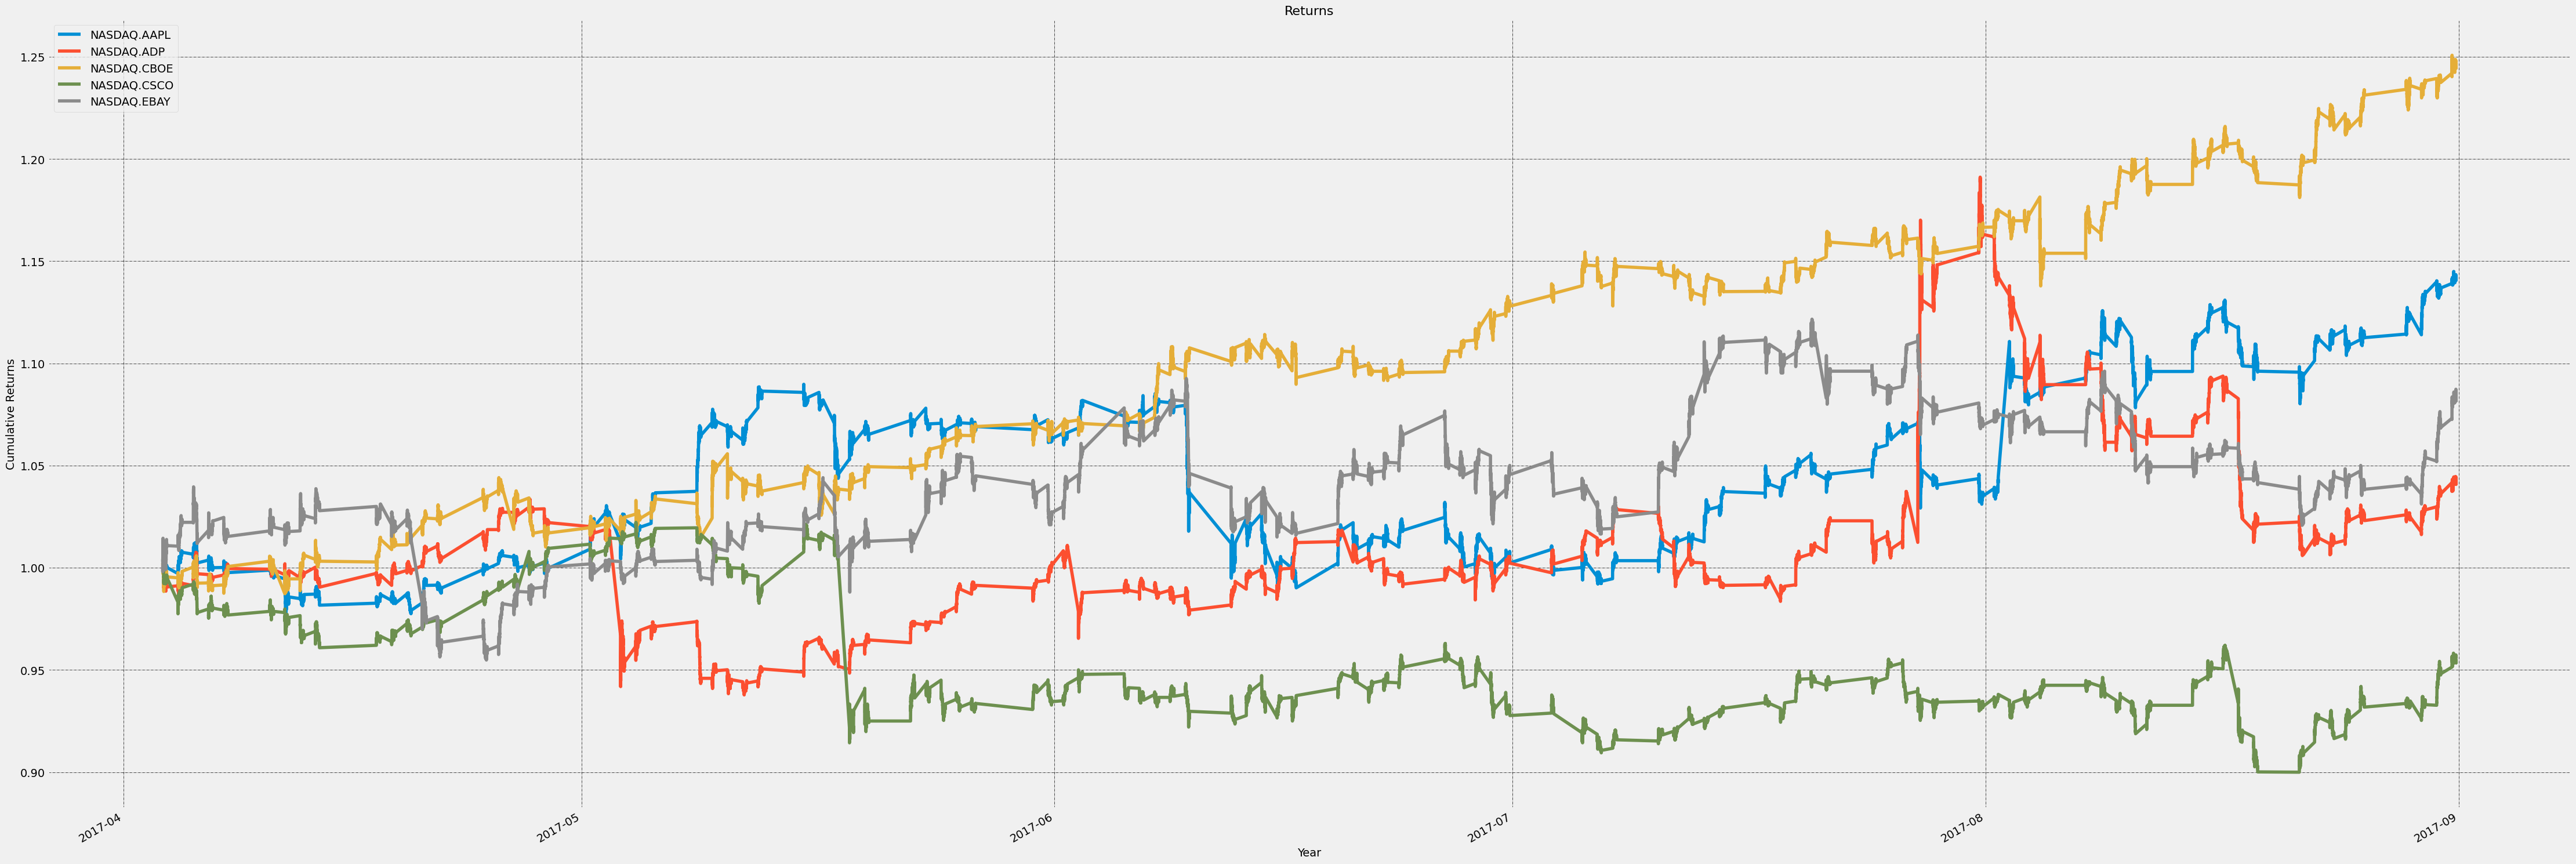

In [ ]:
# Plot all the close prices
((new_df.pct_change()+1).cumprod()).plot(figsize=(50, 20))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

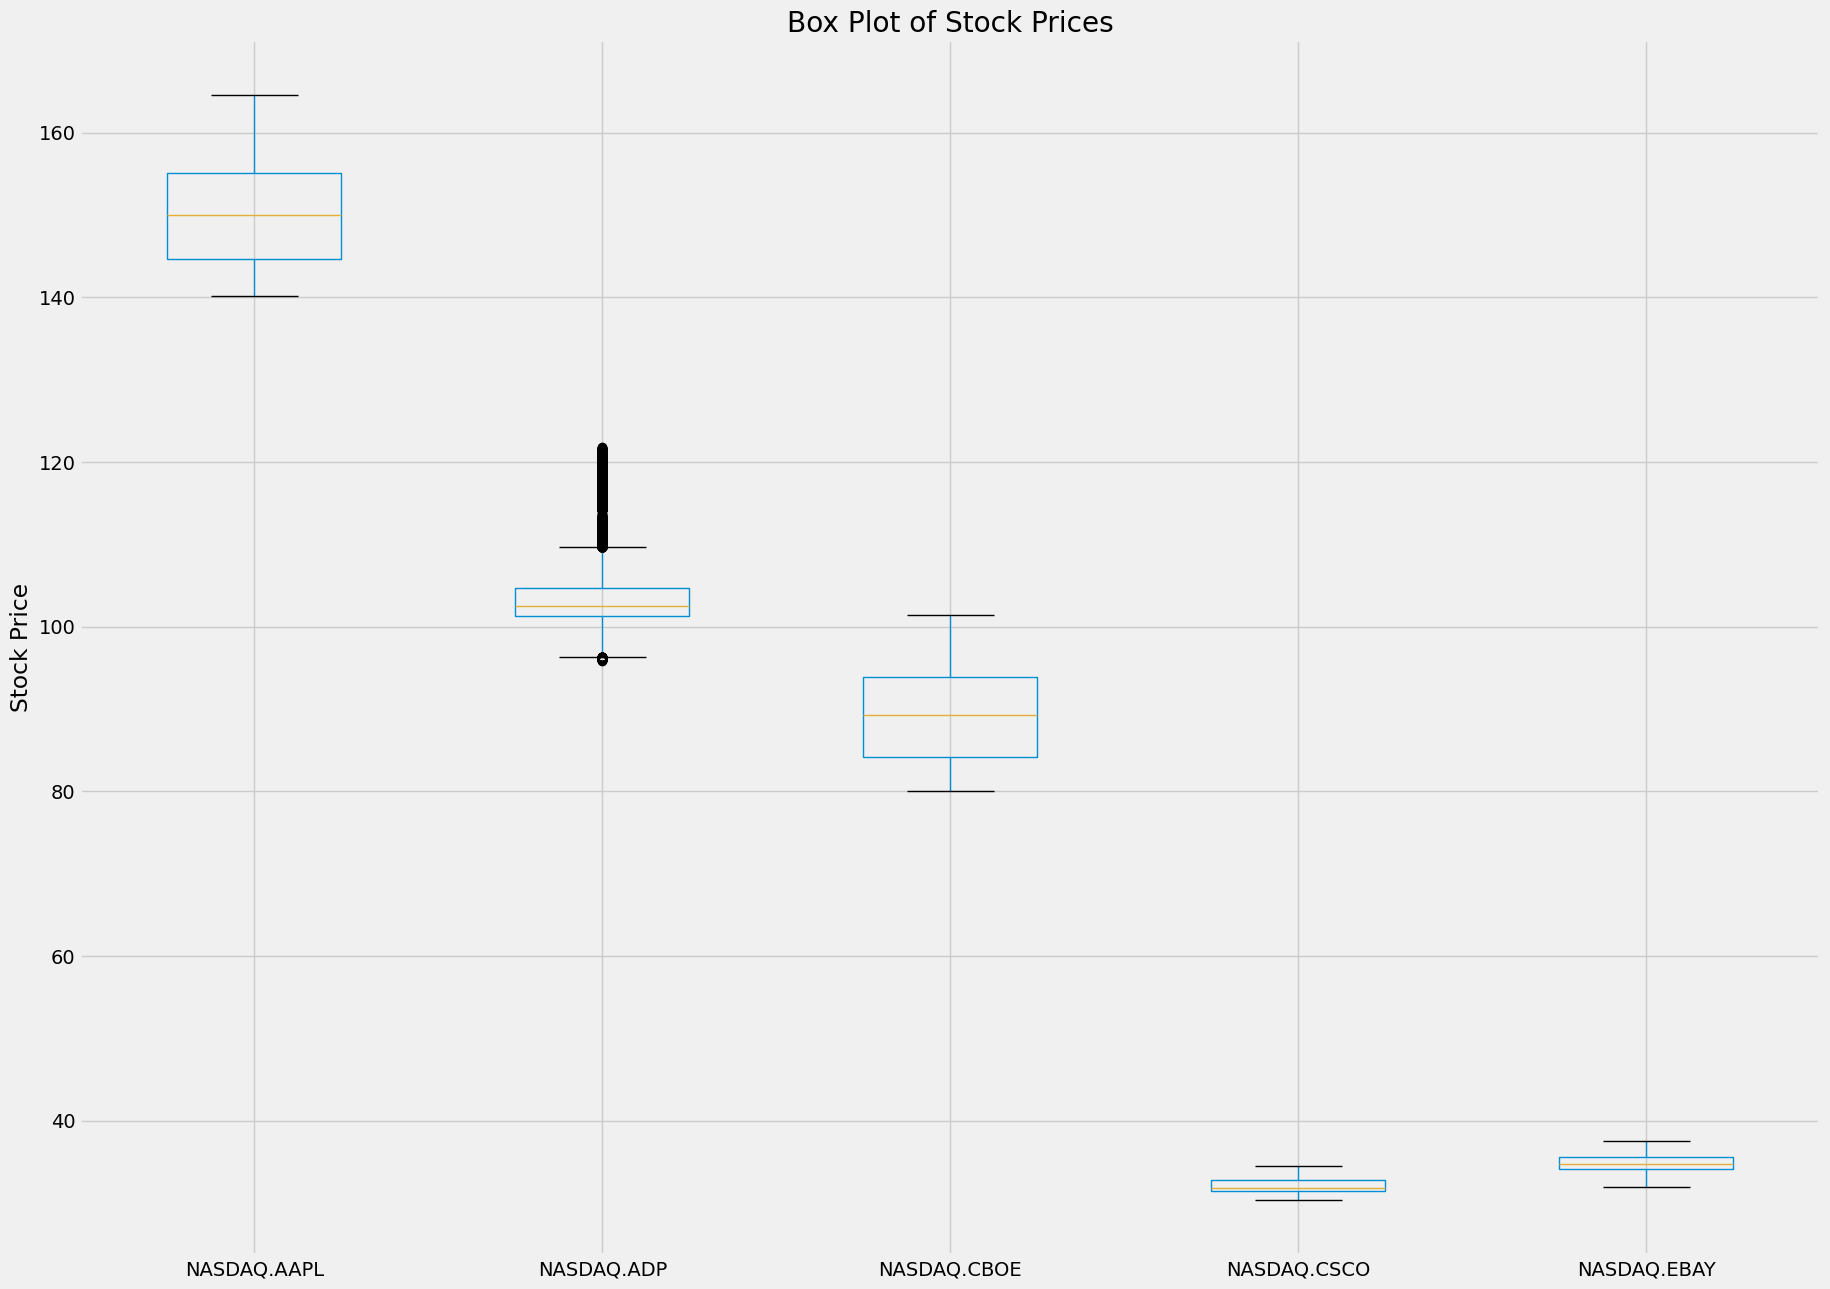

In [ ]:
# Box plot to identify outliers in each stock
plt.figure(figsize=(20, 15))
new_df.boxplot()
plt.title('Box Plot of Stock Prices')
plt.ylabel('Stock Price')
plt.show()

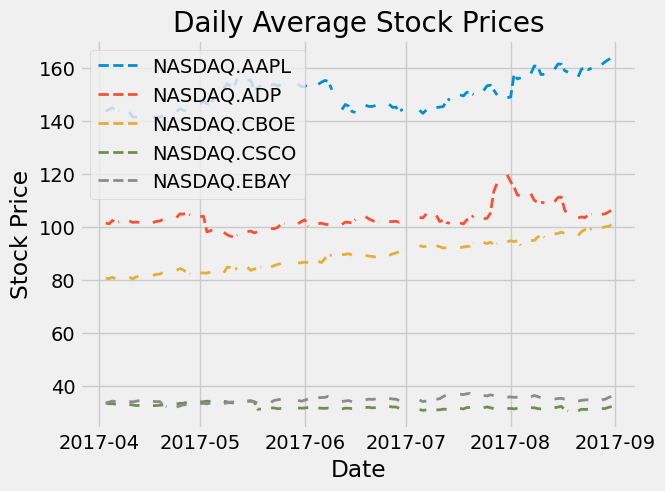

In [ ]:
# Resampling to daily frequency and plotting daily averages
daily_df = new_df.resample('D').mean()
plt.figure()
for column in daily_df.columns:
    plt.plot(daily_df.index, daily_df[column], label=column, linestyle='dashed', linewidth=2)
plt.title('Daily Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
daily_df.isna().sum()

NASDAQ.AAPL    45
NASDAQ.ADP     45
NASDAQ.CBOE    45
NASDAQ.CSCO    45
NASDAQ.EBAY    45
dtype: int64

In [ ]:
daily_df = daily_df.interpolate(method='linear') # while analysing the seasonal decompose it will not handle the missing values hence we need to interpolate

In [ ]:
# Function to apply seasonal decomposition and return decomposed components
def apply_seasonal_decomposition(stock_data):
    decomposition = seasonal_decompose(stock_data, model='additive', period=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    return trend, seasonal, residual

# Apply seasonal decomposition to all columns in the DataFrame
trends, seasonals, residuals = {}, {}, {}
for column in daily_df.columns:
    trends[column], seasonals[column], residuals[column] = apply_seasonal_decomposition(daily_df[column])

# Plot seasonal decomposition for all columns
fig_decomposition = go.Figure()
for column in daily_df.columns:
    fig_decomposition.add_trace(go.Scatter(x=daily_df.index, y=daily_df[column], mode='lines', name=f'Actual ({column})'))
    fig_decomposition.add_trace(go.Scatter(x=daily_df.index, y=trends[column], mode='lines', name=f'Trend ({column})'))
    fig_decomposition.add_trace(go.Scatter(x=daily_df.index, y=seasonals[column], mode='lines', name=f'Seasonal ({column})'))
    fig_decomposition.add_trace(go.Scatter(x=daily_df.index, y=residuals[column], mode='lines', name=f'Residual ({column})'))
fig_decomposition.update_layout(title='Seasonal Decomposition of Stock Prices',
                                xaxis_title='Date',
                                yaxis_title='Stock Price',
                                showlegend=True)
fig_decomposition.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



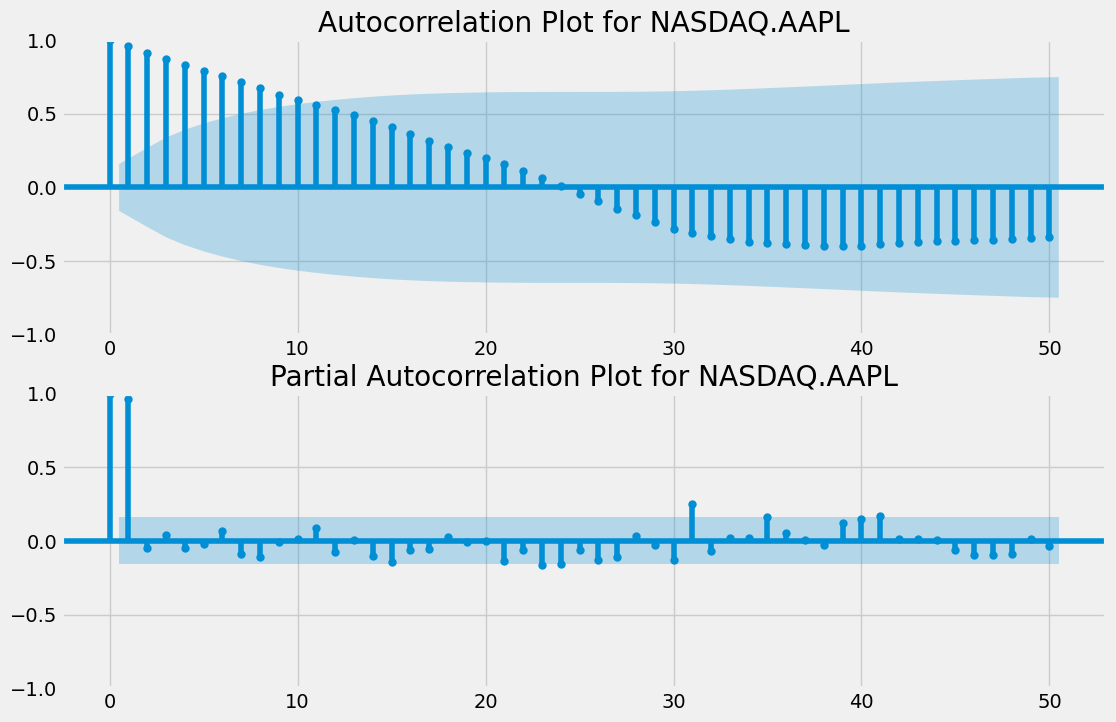

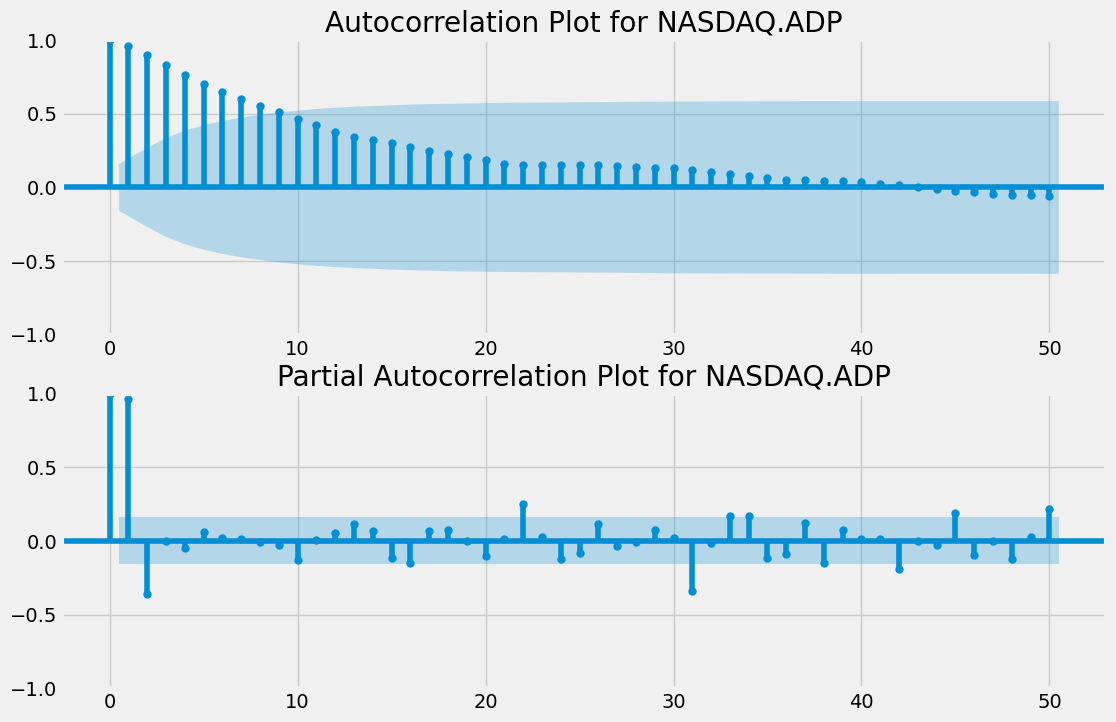

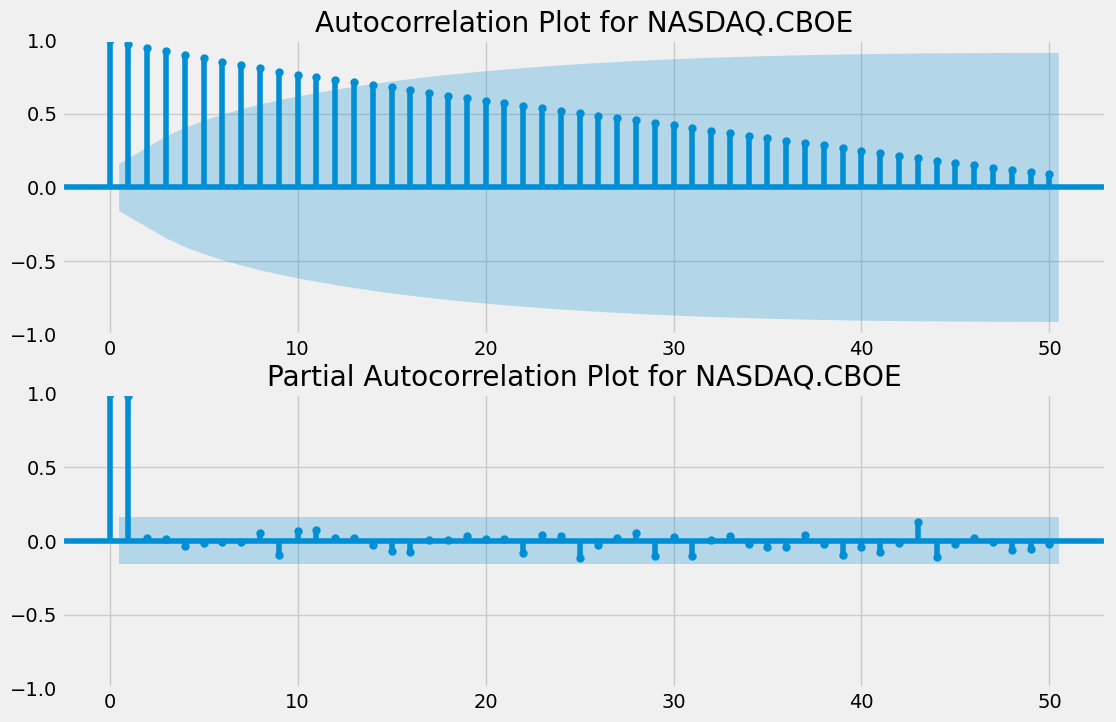

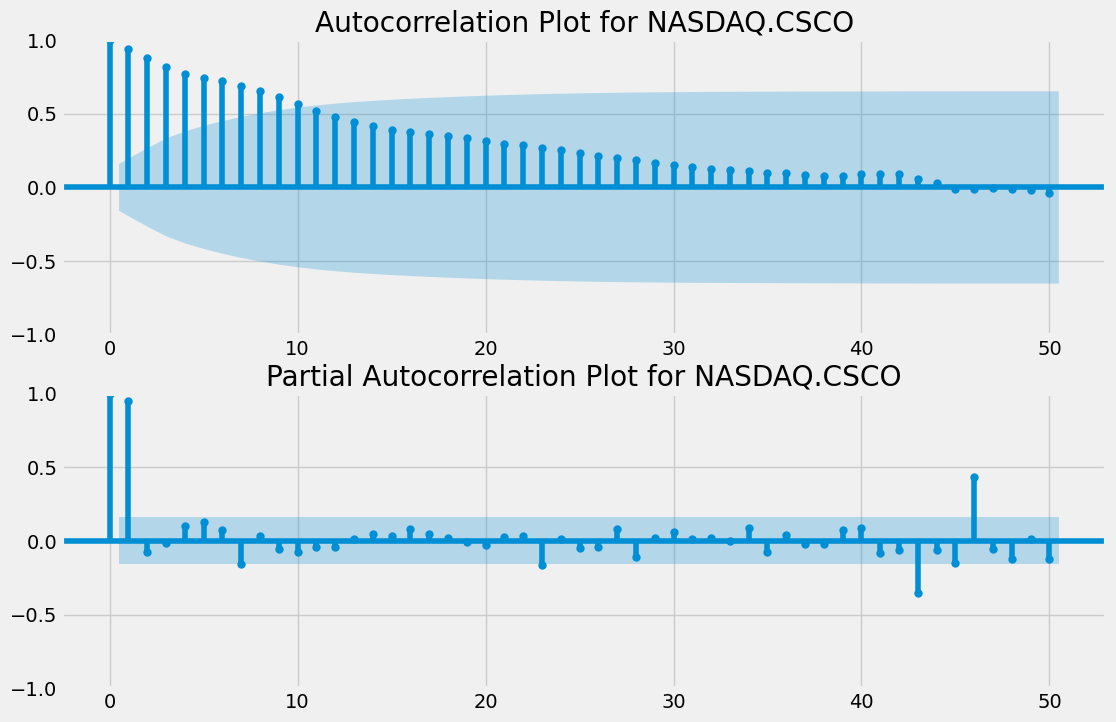

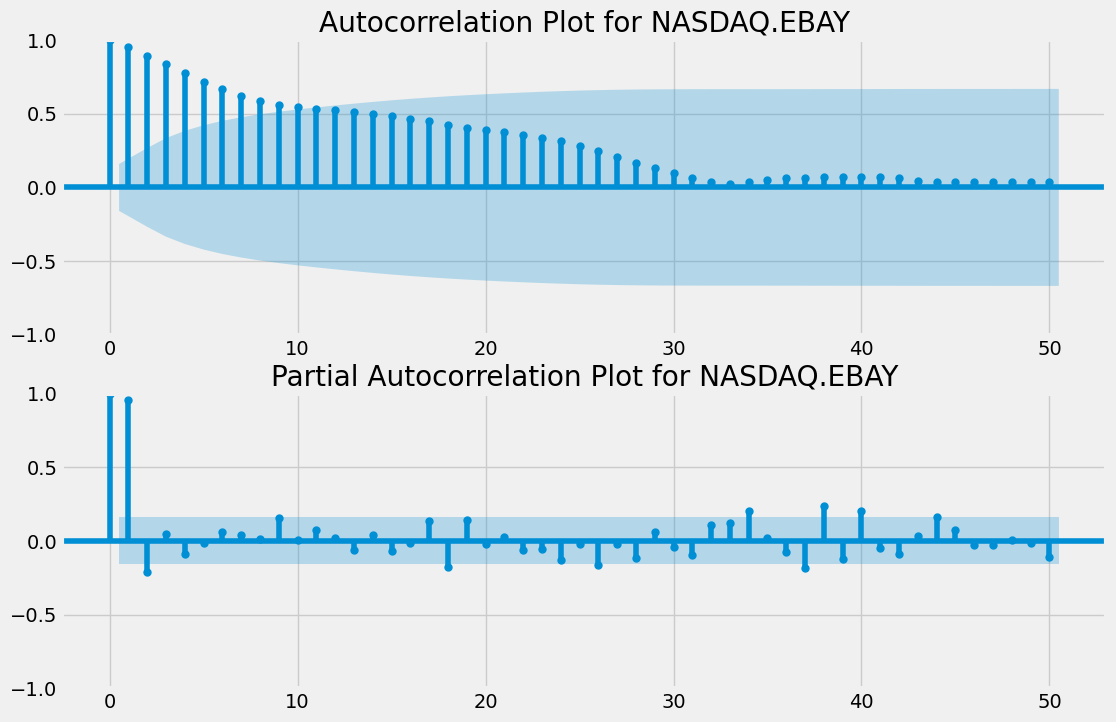

In [ ]:
# Function to apply autocorrelation and partial autocorrelation plots
def plot_acf_pacf(stock_data, stock_name):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(stock_data, lags=50, ax=axes[0])
    plot_pacf(stock_data, lags=50, ax=axes[1])
    axes[0].set_title(f'Autocorrelation Plot for {stock_name}')
    axes[1].set_title(f'Partial Autocorrelation Plot for {stock_name}')
    plt.show()

# Apply autocorrelation and partial autocorrelation plots to all columns in the DataFrame
for column in daily_df.columns:
    plot_acf_pacf(daily_df[column], stock_name=column)